In [ ]:
"""
一旦不进行归一化，这个数据就会非常逆天。但是进行了归一化……也是反方向的逆天了
"""

In [126]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt

In [127]:
x = torch.linspace(0, 1000, 10000).unsqueeze(1)#+torch.Tensor(np.random.randn(10000,1))
y = torch.logspace(0, 3, 10000).unsqueeze(1)
print(f"x.shape: {x.shape}, y.shape: {y.shape}")

x.shape: torch.Size([10000, 1]), y.shape: torch.Size([10000, 1])


In [128]:
x_train = x.clone()[0:6000]
y_train = y.clone()[0:6000]
x_test = x.clone()[6000:]
y_test = y.clone()[6000:]
train_data = DataLoader(TensorDataset(x_train, y_train), batch_size=10, shuffle=False,drop_last=True)
test_data = DataLoader(TensorDataset(x_test, y_test), batch_size=10, shuffle=False,drop_last=True)

In [129]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(1,10)
        self.fc2 = nn.Linear(10,5)
        self.fc3 = nn.Linear(5,1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
model = Net()
model = model.to(device)

In [130]:
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)

In [131]:
def train(num_epochs):
    model.train()
    losses = []
    epoches = torch.arange(1, num_epochs+1)
    for epoch in range(num_epochs):
        running_loss = 0.0
        for idx, (x,y) in enumerate(train_data):
            optimizer.zero_grad()
            x,y = x.to(device), y.to(device)
            x_min, x_max = x.min(), x.max()
            y_min, y_max = y.min(), y.max()
            x = (x - x_min) / (x_max - x_min)
            y = (y - y_min) / (y_max - y_min)
            y_pred = model(x)
            loss = criterion(y_pred, y)

            loss.backward()
            optimizer.step()
            running_loss += loss.item()*x.size(0)
            if (idx+1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}],Batches[{idx+1}/{len(train_data)}], Loss: {running_loss/(idx+1):.3f}")
        losses.append(running_loss/len(train_data.dataset))
    plt.plot(epoches, losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

def test():
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for idx, (x,y) in enumerate(test_data):
            x, y = x.to(device), y.to(device)
            x_min, x_max = x.min(), x.max()
            y_min, y_max = y.min(), y.max()
            x = (x - x_min) / (x_max - x_min)
            y = (y - y_min) / (y_max - y_min)
            y_pred = model(x)
            loss = criterion(y_pred, y)
            running_loss += loss.item()
        avg_loss = running_loss/len(test_data.dataset)
        print(f"Test Loss: {avg_loss:.3f}")


Epoch [1/10],Batches[100/600], Loss: 0.889
Epoch [1/10],Batches[200/600], Loss: 0.627
Epoch [1/10],Batches[300/600], Loss: 0.434
Epoch [1/10],Batches[400/600], Loss: 0.325
Epoch [1/10],Batches[500/600], Loss: 0.260
Epoch [1/10],Batches[600/600], Loss: 0.217
Epoch [2/10],Batches[100/600], Loss: 0.000
Epoch [2/10],Batches[200/600], Loss: 0.000
Epoch [2/10],Batches[300/600], Loss: 0.000
Epoch [2/10],Batches[400/600], Loss: 0.000
Epoch [2/10],Batches[500/600], Loss: 0.000
Epoch [2/10],Batches[600/600], Loss: 0.000
Epoch [3/10],Batches[100/600], Loss: 0.000
Epoch [3/10],Batches[200/600], Loss: 0.000
Epoch [3/10],Batches[300/600], Loss: 0.000
Epoch [3/10],Batches[400/600], Loss: 0.000
Epoch [3/10],Batches[500/600], Loss: 0.000
Epoch [3/10],Batches[600/600], Loss: 0.000
Epoch [4/10],Batches[100/600], Loss: 0.000
Epoch [4/10],Batches[200/600], Loss: 0.000
Epoch [4/10],Batches[300/600], Loss: 0.000
Epoch [4/10],Batches[400/600], Loss: 0.000
Epoch [4/10],Batches[500/600], Loss: 0.000
Epoch [4/10

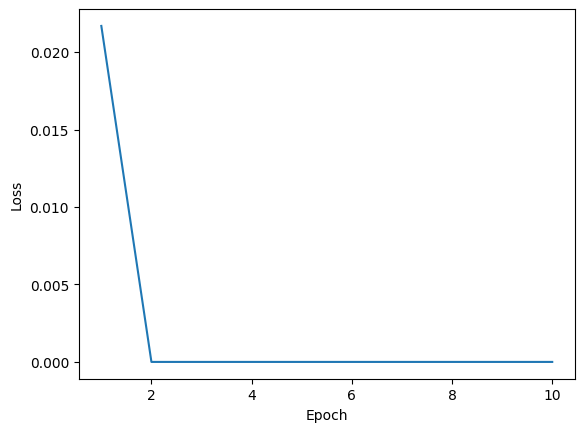

Test Loss: 0.000


In [132]:
if __name__ == "__main__":
    num_epochs = 10
    train(num_epochs)
    test()